<a href="https://colab.research.google.com/github/Raisaguzman/challenge2-data-science-LATAM/blob/main/TelecomX_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [365]:
import pandas as pd
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación#

# **Conociendo los datos**

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [367]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [368]:
!curl https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_diccionario.md

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: t

In [369]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [370]:
for col in df.columns:
    try:
        print(f"{col}: {df[col].unique()[:10]}")
    except Exception as e:
        print(f"{col}: Error al procesar - {e}")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']
Churn: ['No' 'Yes' '']
customer: Error al procesar - unhashable type: 'dict'
phone: Error al procesar - unhashable type: 'dict'
internet: Error al procesar - unhashable type: 'dict'
account: Error al procesar - unhashable type: 'dict'


In [371]:
customer_df = pd.json_normalize(df['customer'])
customer_df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [318]:
phone_df = pd.json_normalize(df['phone'])
phone_df.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [319]:
internet_df = pd.json_normalize(df['internet'])
internet_df.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [492]:
account_df = pd.json_normalize(df['account'])
account_df.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [493]:
df_clean = pd.concat([
    df.drop(columns=['customer', 'phone', 'internet', 'account']),
    customer_df, phone_df, internet_df, account_df
], axis=1)

display(df_clean.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#**`Comprobación de incoherencias en los datos`**

#buscando valores nulos

In [494]:
df_clean.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [495]:
df_clean['Churn'].value_counts(dropna=False)

,count
Churn,
No,5174
Yes,1869
,224


In [496]:
df_clean = df_clean[df_clean['Churn'].isin(['Yes', 'No'])]


In [497]:
df_clean['Churn'].value_counts(dropna=False)

,count
Churn,
No,5174
Yes,1869


#***Buscando duplicados***

In [498]:
df_clean = df_clean.drop_duplicates()

In [499]:
df_clean['SeniorCitizen'] = df_clean['SeniorCitizen'].astype(bool)

In [500]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   bool   
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [503]:
df_clean = pd.concat([
    df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
    df['customer'].apply(pd.Series),
    df['phone'].apply(pd.Series),
    df['internet'].apply(pd.Series),
    df['account'].apply(pd.Series)
], axis=1)
df_expanded = df_clean

In [504]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7267 non-null   object
 2   gender            7267 non-null   object
 3   SeniorCitizen     7267 non-null   int64 
 4   Partner           7267 non-null   object
 5   Dependents        7267 non-null   object
 6   tenure            7267 non-null   int64 
 7   PhoneService      7267 non-null   object
 8   MultipleLines     7267 non-null   object
 9   InternetService   7267 non-null   object
 10  OnlineSecurity    7267 non-null   object
 11  OnlineBackup      7267 non-null   object
 12  DeviceProtection  7267 non-null   object
 13  TechSupport       7267 non-null   object
 14  StreamingTV       7267 non-null   object
 15  StreamingMovies   7267 non-null   object
 16  Contract          7267 non-null   object
 17  PaperlessBilli

In [426]:
df_expanded['Churn'].value_counts(dropna=False)

,count
Churn,
No,5174
Yes,1869
,224


In [428]:
df_expanded = df_expanded[df_expanded['Churn'].isin(['Yes', 'No'])]

In [430]:
df_expanded['Churn'].value_counts(dropna=False)

,count
Churn,
No,5174
Yes,1869


In [330]:
missing = df_expanded.isnull().sum()
print(missing[missing > 0])

Series([], dtype: int64)


In [331]:
df_expanded.fillna(value="Unknown", inplace=True)

In [332]:
print(df_expanded['gender'].unique())

['Female' 'Male']


In [333]:
print(df_expanded['Contract'].unique())

['One year' 'Month-to-month' 'Two year']


In [334]:
df_expanded['gender'] = df_expanded['gender'].replace({'male': 'Male', 'female': 'Female'})

In [335]:
duplicados = df_expanded.duplicated(subset='customerID')
print(f"Duplicados encontrados: {duplicados.sum()}")

Duplicados encontrados: 0


In [336]:
print(df_expanded.isnull().sum().sum())

0


In [337]:
print(df_expanded.shape)

(7267, 20)


#***Columna de cuentas diarias***

In [338]:
account_df['Cuentas_Diarias'] = (account_df['Charges.Monthly'] / 30).round(2)
account_df[['Charges.Monthly', 'Cuentas_Diarias']]

,Charges.Monthly,Cuentas_Diarias
0,65.60,2.19
1,59.90,2.00
2,73.90,2.46
3,98.00,3.27
4,83.90,2.80
...,...,...
7262,55.15,1.84
7263,85.10,2.84
7264,50.30,1.68
7265,67.85,2.26


#**Estandarización y transformación de datos**

In [433]:
df_estandarizado = df_expanded.replace({'Yes': 1, 'No': 0})
df_estandarizado.head()

<ipython-input-433-49778520c138>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_estandarizado = df_expanded.replace({'Yes': 1, 'No': 0})


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [434]:
df_estandarizado['Churn'].value_counts(dropna=False)

,count
Churn,
0,5174
1,1869


In [351]:
traducciones_columnas = {
    'customerID': 'ID_cliente',
    'Churn': 'Evasion',
    'gender': 'Genero',
    'SeniorCitizen': 'Adulto_mayor',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Plazo',
    'PhoneService': 'Servicio_telefonico',
    'MultipleLines': 'Multiples_lineas',
    'InternetService': 'Servicio_internet',
    'OnlineSecurity': 'Seguridad_online',
    'OnlineBackup': 'Copia_online',
    'DeviceProtection': 'Proteccion_dispositivo',
    'TechSupport': 'Soporte_tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_peliculas',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Facturacion_electronica',
    'PaymentMethod': 'Metodo_pago',
    'Charges.Monthly': 'Cuota_mensual',
    'Charges.Total': 'Cuota_total',
   }

#**Cambio de nombre de las columnas**

In [435]:
df_estandarizado.rename(columns=traducciones_columnas, inplace=True)
display(df_estandarizado.head())

,ID_cliente,Evasion,Genero,Adulto_mayor,Pareja,Dependientes,Plazo,Servicio_telefonico,Multiples_lineas,Servicio_internet,Seguridad_online,Copia_online,Proteccion_dispositivo,Soporte_tecnico,Streaming_TV,Streaming_peliculas,Contrato,Facturacion_electronica,Metodo_pago,Charges
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


#📊 **Carga y análisis(L - Load & Analysis)**

#Análisis Descriptivo

In [438]:
df_estandarizado.describe()

,Evasion,Adulto_mayor,Pareja,Dependientes,Plazo,Servicio_telefonico,Facturacion_electronica
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000


In [535]:
df_estandarizado.groupby("Contrato")["Evasion"].value_counts(normalize=True).unstack() * 100

Evasion,0,1
Contrato,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


#Distribución de evasión

#Recuento de evasión por variables categóricas

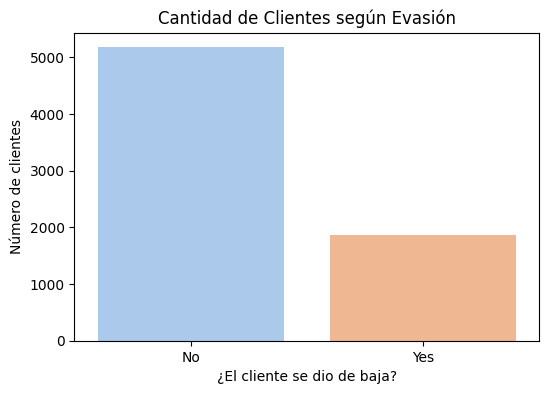

In [456]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras
plt.figure(figsize=(6, 4))
sns.countplot(x=df_estandarizado['Evasion'].map({1: 'Yes', 0: 'No'}), data=df_estandarizado, palette='pastel')
plt.title('Cantidad de Clientes según Evasión')
plt.xlabel('¿El cliente se dio de baja?')
plt.ylabel('Número de clientes')
plt.show()

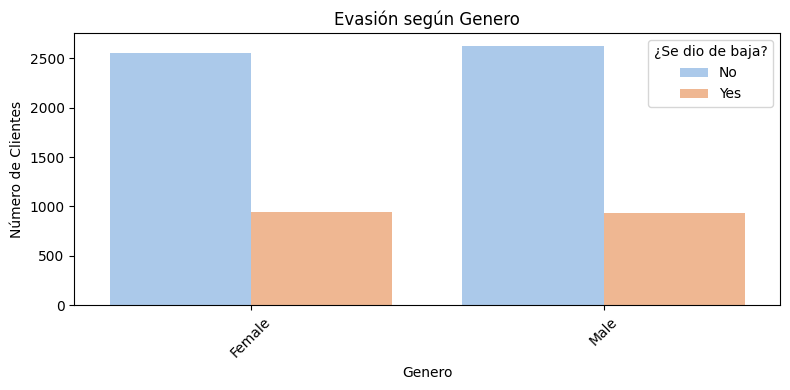

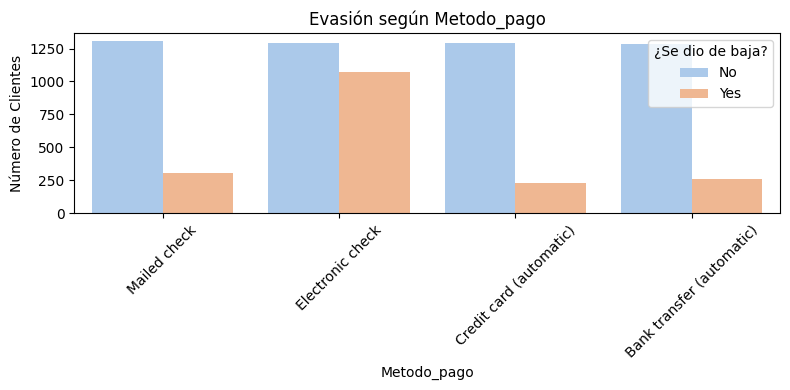

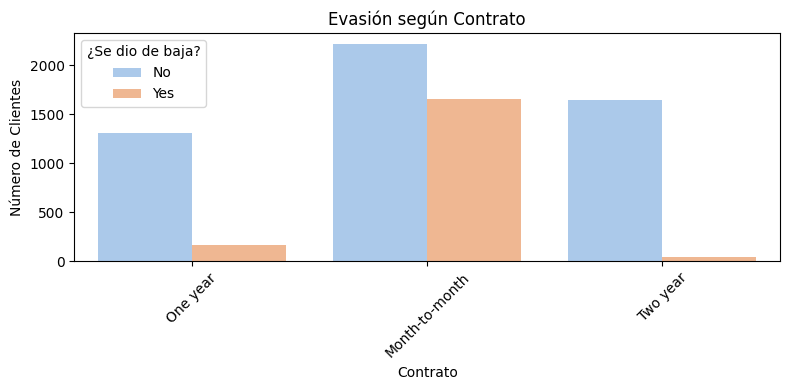

In [460]:
import seaborn as sns
import matplotlib.pyplot as plt

columnas_categoricas = [
    'Genero', 'Metodo_pago', 'Contrato']


for columna in columnas_categoricas:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=columna, hue=df_estandarizado['Evasion'].map({1: 'Yes', 0: 'No'}), data=df_estandarizado, palette='pastel')
    plt.title(f'Evasión según {columna}')
    plt.xlabel(columna)
    plt.ylabel('Número de Clientes')
    plt.legend(title='¿Se dio de baja?')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

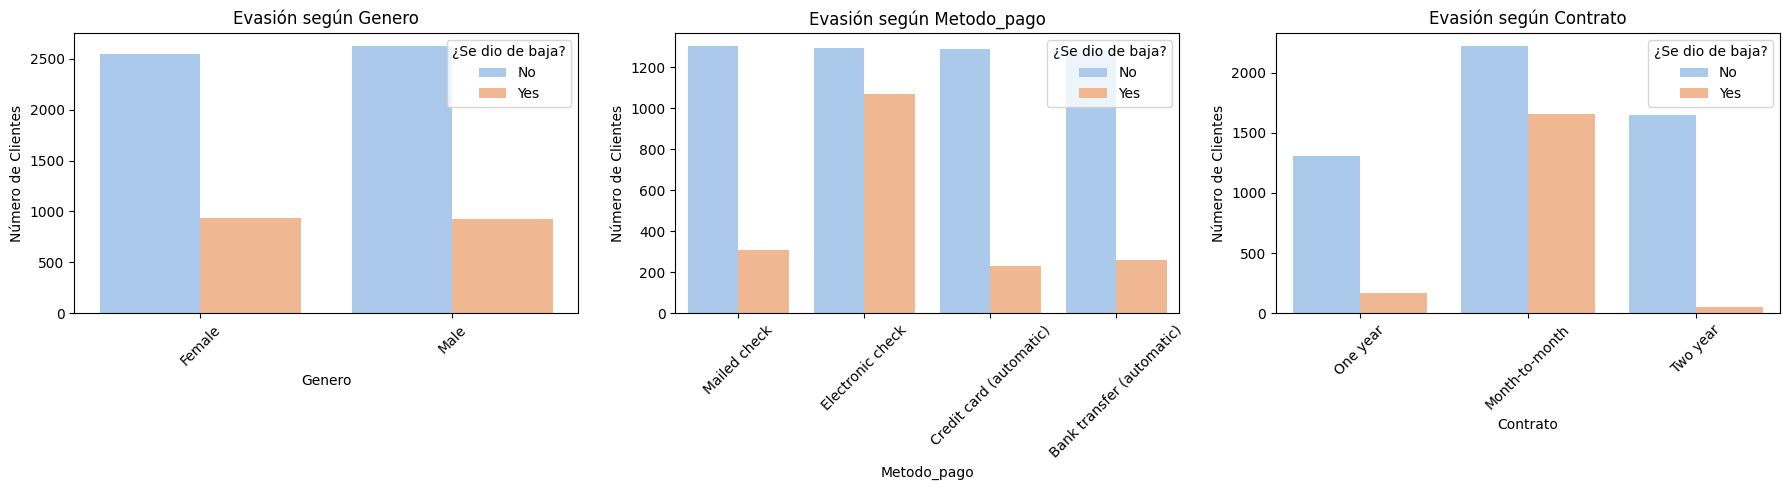

In [461]:
import seaborn as sns
import matplotlib.pyplot as plt

columnas_categoricas = ['Genero', 'Metodo_pago', 'Contrato']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, columna in enumerate(columnas_categoricas):
    sns.countplot(
        x=columna,
        hue=df_estandarizado['Evasion'].map({1: 'Yes', 0: 'No'}),
        data=df_estandarizado,
        palette='pastel',
        ax=axes[i]
    )
    axes[i].set_title(f'Evasión según {columna}')
    axes[i].set_xlabel(columna)
    axes[i].set_ylabel('Número de Clientes')
    axes[i].legend(title='¿Se dio de baja?')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#Conteo de evasión por variables numéricas

In [522]:
# Extraer valores directamente sin convertirlos
df_estandarizado['Monthly'] = df_estandarizado['Charges'].apply(lambda x: x['Monthly'])

# Handle potential non-numeric values in 'Total' before converting to float
df_estandarizado['Total'] = df_estandarizado['Charges'].apply(lambda x: x['Total']).replace(' ', None).astype(float)

# Verificar la nueva estructura
print(df_estandarizado[['Monthly', 'Total']].head())

   Monthly    Total
0     65.6   593.30
1     59.9   542.40
2     73.9   280.85
3     98.0  1237.85
4     83.9   267.40


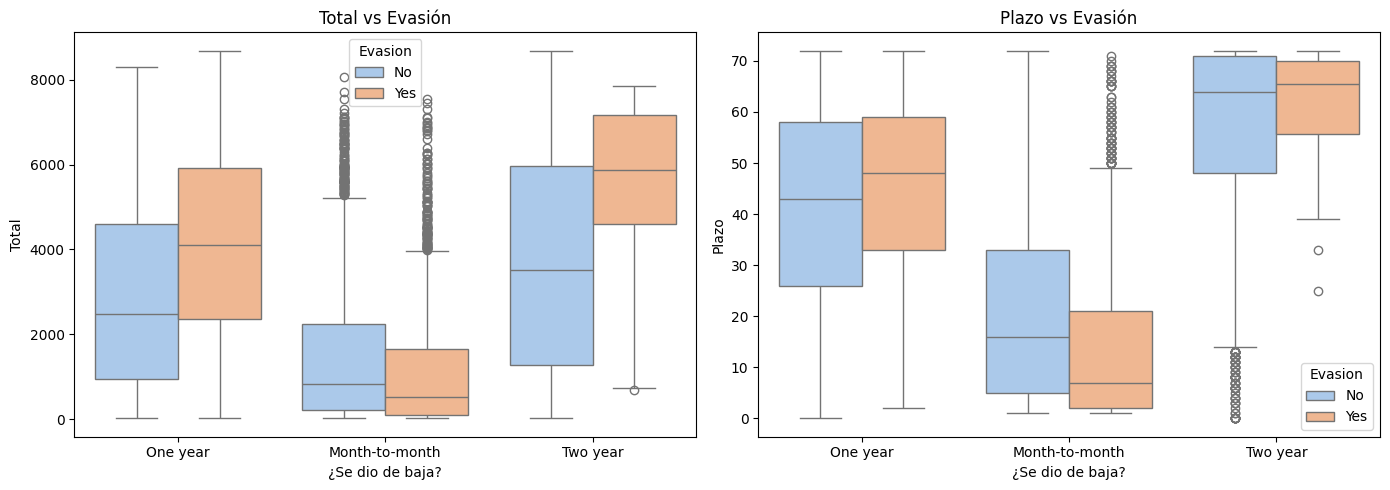

In [528]:
import matplotlib.pyplot as plt
import seaborn as sns

variables_numericas = ['Total', 'Plazo']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for i, var in enumerate(variables_numericas):
    sns.boxplot(x=columna,
        hue=df_estandarizado['Evasion'].map({1: 'Yes', 0: 'No'}),
                y=var, data=df_estandarizado, palette='pastel', ax=axes[i])
    axes[i].set_title(f'{var} vs Evasión')
    axes[i].set_xlabel('¿Se dio de baja?')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()


In [518]:
print(df_estandarizado.columns)

Index(['ID_cliente', 'Evasion', 'Genero', 'Adulto_mayor', 'Pareja',
       'Dependientes', 'Plazo', 'Servicio_telefonico', 'Multiples_lineas',
       'Servicio_internet', 'Seguridad_online', 'Copia_online',
       'Proteccion_dispositivo', 'Soporte_tecnico', 'Streaming_TV',
       'Streaming_peliculas', 'Contrato', 'Facturacion_electronica',
       'Metodo_pago', 'Charges'],
      dtype='object')


In [519]:
print(df_estandarizado['Charges'].head())

0      {'Monthly': 65.6, 'Total': '593.3'}
1      {'Monthly': 59.9, 'Total': '542.4'}
2     {'Monthly': 73.9, 'Total': '280.85'}
3    {'Monthly': 98.0, 'Total': '1237.85'}
4      {'Monthly': 83.9, 'Total': '267.4'}
Name: Charges, dtype: object


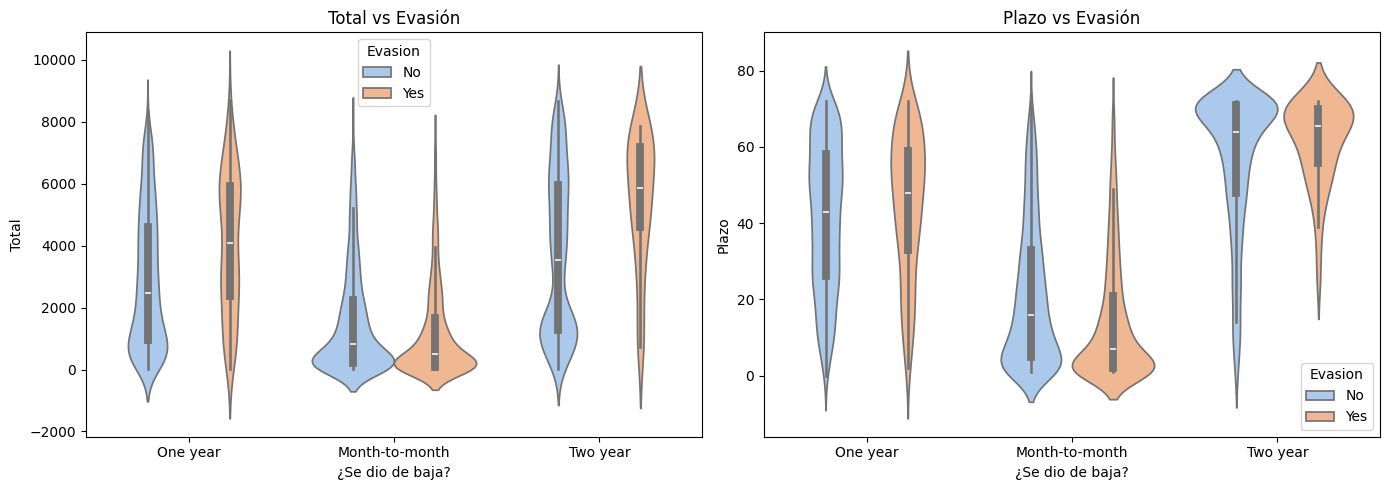

In [530]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

variables_numericas = ['Total', 'Plazo']

for i, var in enumerate(variables_numericas):
    sns.violinplot(x=columna,
        hue=df_estandarizado['Evasion'].map({1: 'Yes', 0: 'No'}), y=var, data=df_estandarizado, palette="pastel", ax=axes[i])
    axes[i].set_title(f'{var} vs Evasión')
    axes[i].set_xlabel('¿Se dio de baja?')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()


#**Informe**

Análisis de Evasión de Clientes
 Introducción
La evasión de clientes (Churn) es un problema crucial para las empresas de telecomunicaciones, ya que representa pérdidas de ingresos y dificultades para la retención de usuarios. Este análisis tiene como objetivo identificar patrones en la cancelación de servicios, examinando características clave como el contrato, los pagos, el tiempo de permanencia (tenure) y el monto gastado (Charges.Total).
A través de un análisis exploratorio detallado, buscamos encontrar factores que influyen en la cancelación y ofrecer estrategias para mejorar la retención de clientes.
Limpieza y Tratamiento de Datos
Importación y exploración inicial
•	Se analizaron las variables del conjunto de datos, incluyendo información demográfica (gender, SeniorCitizen, Partner, Dependents) y datos de suscripción (Contract, InternetService, PaymentMethod).
•	Se identificó que Charges contenía valores en forma de diccionarios (Charges.Monthly y Charges.Total), por lo que se separaron en columnas individuales para facilitar el análisis.
Transformaciones clave
•	Conversión de Churn en una variable categórica para distinguir entre clientes activos y cancelados.
•	Conversión de Charges.Total y Charges.Monthly en valores numéricos.
•	Eliminación de valores nulos y ajustes en formatos incorrectos (tenure, PaymentMethod).
•	Normalización de valores numéricos y categorización de Evasion para facilitar la visualización en gráficos.
Análisis Exploratorio de Datos
1️.Evasión según duración del contrato (tenure)
•	Se observó que los clientes con contratos más cortos tienen mayor tasa de cancelación, indicando que la falta de compromiso a largo plazo influye en la decisión de abandonar el servicio.
2 Análisis del gasto (Charges.Total y Charges.Monthly)
•	Los clientes con facturación mensual alta tienden a cancelar más, lo que indica que el costo podría influir en la evasión.
•	Los clientes con mayor gasto total suelen estar más tiempo en la empresa, lo que sugiere que aquellos de larga permanencia invierten más en el servicio.
3️ Influencia del tipo de contrato en la cancelación
•	Los clientes con contratos mensuales tienen mayor tasa de cancelación, mientras que los de contratos anuales o bianuales tienen una menor tendencia a abandonar el servicio.
📑 Tabla de porcentaje de evasión según contrato:
python
df_estandarizado.groupby("Contrato")["Evasion"].value_counts(normalize=True).unstack() * 100
Esta tabla ayuda a analizar qué tipo de suscripción es más estable y cuál es más propenso a la rotación de clientes.
 Conclusiones e Insights
•	El tiempo de suscripción (tenure) es un factor clave en la evasión, ya que los clientes con menor tiempo en la empresa tienden a cancelar más.
•	El costo del servicio (Charges.Monthly) tiene un impacto significativo, indicando que los precios podrían ser un punto crítico en la retención de clientes.
•	Los clientes con contratos mensuales son más propensos a dejar el servicio, lo que sugiere que los compromisos a largo plazo pueden reducir la evasión.
•	Los métodos de pago influyen en la cancelación, con mayor retención en pagos automáticos frente a cheques electrónicos o por correo.
Recomendaciones Estratégicas
1.	Fomentar contratos de mayor duración
o	Ofrecer descuentos o beneficios exclusivos para clientes que elijan contratos de largo plazo.
2.	Optimización de precios
o	Evaluar si los clientes con tarifas altas están percibiendo un valor adecuado por lo que pagan.
3.	Programas de retención
o	Implementar estrategias para reducir la cancelación en clientes con menor tiempo de servicio.
4.	Personalización de servicios
o	Mejorar la percepción de valor agregando beneficios que refuercen la satisfacción del cliente.
5.	Análisis predictivo
o	Aplicar modelos de Machine Learning para anticipar clientes con mayor probabilidad de cancelación y tomar medidas preventivas.

